<a href="https://colab.research.google.com/github/GVSU-CIS635/gvsu-cis635-term-project-flood-droughtpredictions/blob/main/CIS635semesterproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#imports
from google.colab import files
import pandas as pd
import numpy as np
import warnings
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

uploaded = files.upload()

Saving streamflow.csv to streamflow.csv


In [3]:
df = pd.read_csv('streamflow.csv')
# Display the first few rows of the DataFrame
df.head()

# Get information about the dataset
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18628 entries, 0 to 18627
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18628 non-null  int64  
 1   Year        18628 non-null  int64  
 2   Month       18628 non-null  int64  
 3   Day         18628 non-null  int64  
 4   Date        18628 non-null  object 
 5   Q (m3/s)    18040 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 873.3+ KB


,Unnamed: 0,Year,Month,Day,Q (m3/s)
count,18628.000000,18628.00000,18628.000000,18628.000000,18040.000000
mean,21276.500000,1992.00000,6.522869,15.729815,10671.594654
std,5377.584743,14.72017,3.448812,8.800403,14275.949377
min,11963.000000,1967.00000,1.000000,1.000000,182.840000
25%,16619.750000,1979.00000,4.000000,8.000000,1419.000000
50%,21276.500000,1992.00000,7.000000,16.000000,3060.000000
75%,25933.250000,2005.00000,10.000000,23.000000,15300.000000
max,30590.000000,2017.00000,12.000000,31.000000,79059.000000


In [4]:
# Drop rows with missing values
df.dropna(inplace=True)

<Axes: >

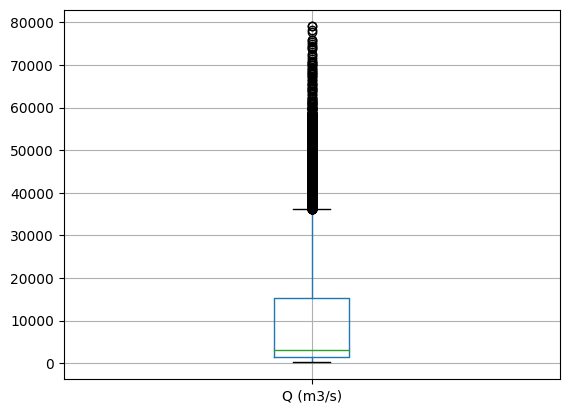

In [5]:
df.boxplot(column=['Q (m3/s)'])

<ipython-input-6-722c4fa6947f>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.resample('Y').mean().index.year, df.resample('Y').mean()['Q (m3/s)'], label='Average Streamflow')
<ipython-input-6-722c4fa6947f>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.resample('Y').mean().index.year, df.resample('Y').mean()['Q (m3/s)'], label='Average Streamflow')


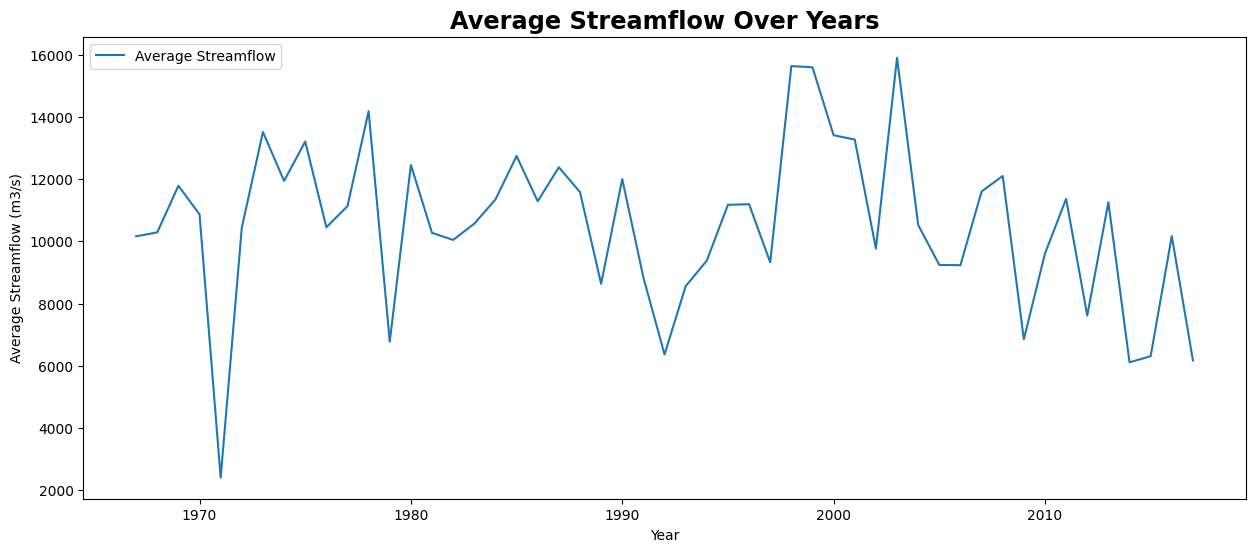

In [6]:
rcParams['figure.figsize'] = 15, 6
rcParams['axes.titlesize'] = 'xx-large'
rcParams['axes.titleweight'] = 'bold'
rcParams["legend.loc"] = 'upper left'
df['timestamp'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Set the timestamp column as the index
df.set_index('timestamp', inplace=True)

# Display the first few rows of your dataset
df.head()

# Visualize the streamflow data over the years
plt.plot(df.resample('Y').mean().index.year, df.resample('Y').mean()['Q (m3/s)'], label='Average Streamflow')
plt.title('Average Streamflow Over Years')
plt.xlabel('Year')
plt.ylabel('Average Streamflow (m3/s)')
plt.legend()
plt.show()

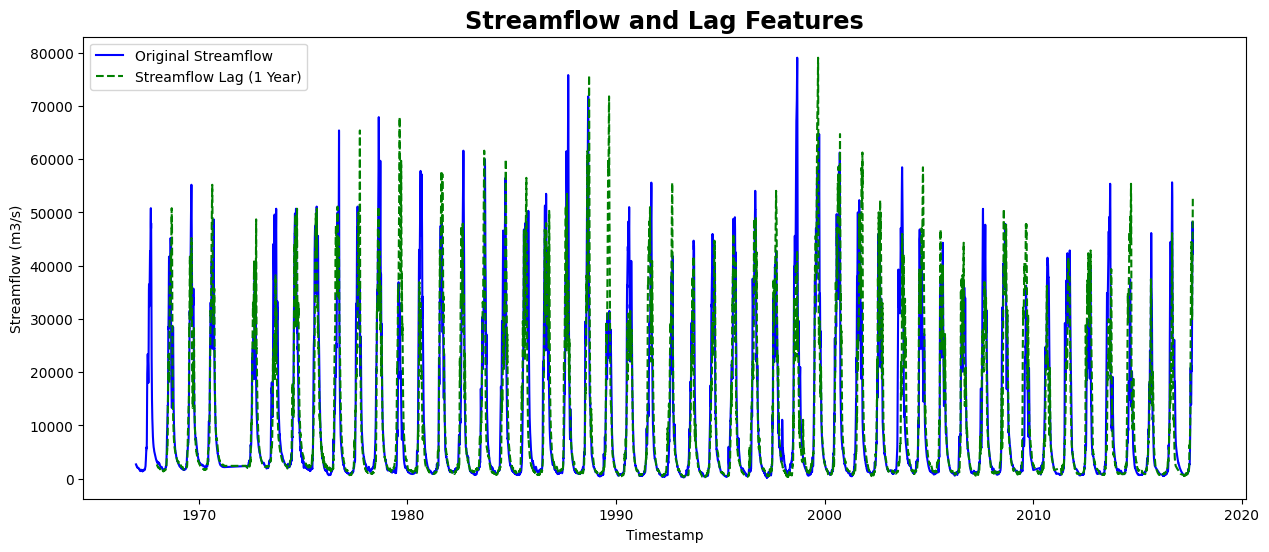

In [14]:
import matplotlib.pyplot as plt

df['streamflow_lag_year'] = df['Q (m3/s)'].shift(365)  # Assuming daily data

# Plot original streamflow and lagged versions
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Q (m3/s)'], label='Original Streamflow', color='blue')
plt.plot(df.index, df['streamflow_lag_year'], label='Streamflow Lag (1 Year)', linestyle='--', color='green')

plt.title('Streamflow and Lag Features')
plt.xlabel('Timestamp')
plt.ylabel('Streamflow (m3/s)')
plt.legend()
plt.show()




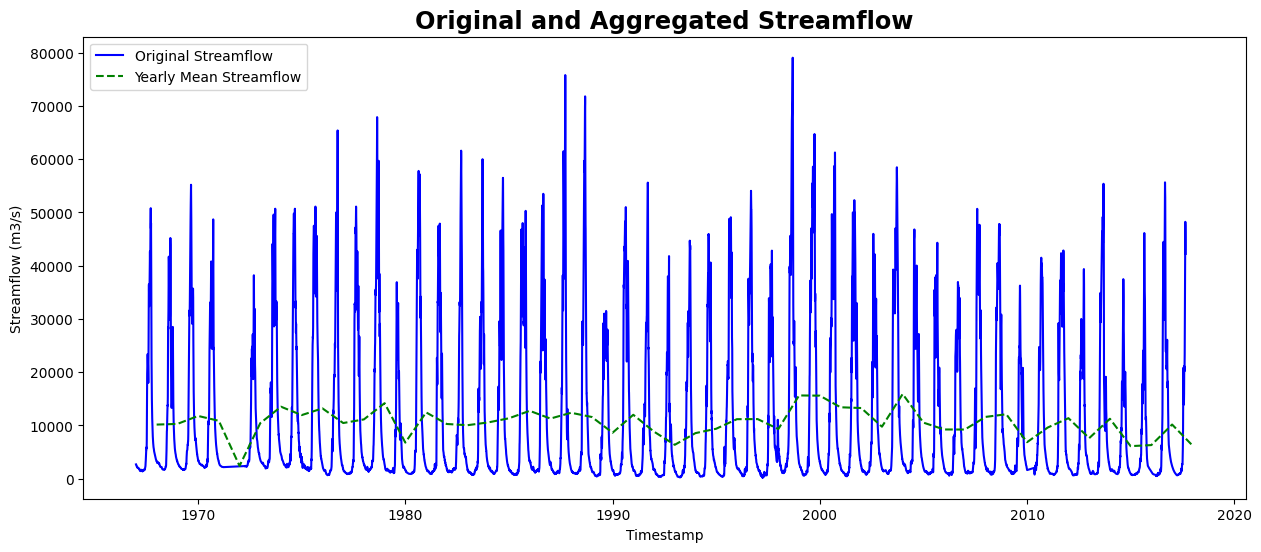

In [15]:
# Resample the data to yearly frequency and calculate the mean
df_yearly = df['Q (m3/s)'].resample('Y').mean()

# Plot the original and aggregated data
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Q (m3/s)'], label='Original Streamflow', color='blue')
plt.plot(df_yearly.index, df_yearly, label='Yearly Mean Streamflow', linestyle='--', color='green')

plt.title('Original and Aggregated Streamflow')
plt.xlabel('Timestamp')
plt.ylabel('Streamflow (m3/s)')
plt.legend()
plt.show()
